In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

# Example 1

## Generate data

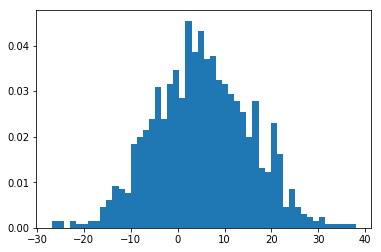

In [3]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [4]:
a = RTBM(1,1)

In [5]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [6]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=884225, Fri Nov  3 19:10:14 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 1.226520265677628e+04 1.0e+00 9.80e-02  9e-02  1e-01 0:00.2
    2     18 1.008058569874781e+04 1.4e+00 1.08e-01  9e-02  1e-01 0:00.4
    3     27 9.878118995156710e+03 1.5e+00 1.13e-01  9e-02  1e-01 0:00.7
   17    153 3.978172184454226e+03 4.9e+00 2.25e-01  2e-01  3e-01 0:03.7
   36    324 3.777320998151900e+03 1.1e+01 8.22e-02  4e-02  1e-01 0:07.7
   59    531 3.745829927494004e+03 2.3e+01 4.10e-02  9e-03  6e-02 0:12.7
   88    792 3.745336761116674e+03 8.0e+01 6.32e-03  6e-04  1e-02 0:18.9
  100    900 3.745334701795830e+03 1.2e+02 1.87e-03  1e-04  3e-03 0:21.5
  139   1251 3.745334316499468e+03 3.8e+02 1.63e-03  3e-05  2e-03 0:29.5
  183   1647 3.745333800744720e+03 9.5e+02 4.46e-03  3e-05  5e-03 0:38.7
  200   1800 3.745333703888159e+03 9.3e+02 3.30e-03  2e-05  3e-03 0:42.2
  221   1989 3.745333652402818e+03 

## Testing output

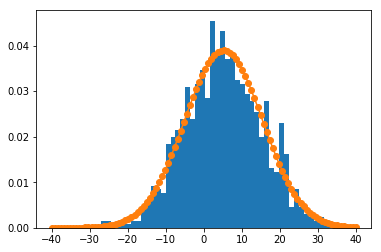

In [7]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

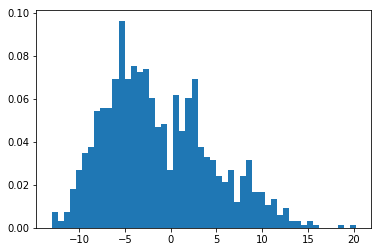

In [7]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [8]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [ ]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=797156, Fri Nov  3 18:58:15 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 1.529953234292351e+04 1.0e+00 9.43e-02  9e-02  1e-01 0:00.3
    2     22 1.161710145135589e+04 1.1e+00 9.78e-02  9e-02  1e-01 0:00.7
    3     33 7.928728238419330e+03 1.2e+00 1.05e-01  1e-01  1e-01 0:00.9
   12    132 3.439527648985584e+03 1.7e+00 1.68e-01  2e-01  2e-01 0:04.1
   13    143 3.401131392981070e+03 1.8e+00 1.73e-01  2e-01  2e-01 0:28.3


## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')